In [1]:
# import libraries 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import PIL
import requests

In [2]:
# load dataset 
df = pd.read_csv("C:/Users/Brianna/visualization/02_activities/assignments/data/img-wage-rate-by-edu-age-sex-ft-pt-ca-on-2006-24.csv")

In [ ]:
#inspect column names
df.columns

Index(['YEAR', 'GEOGRAPHY', 'IMMIGRANT', 'TYPE OF WORK', 'WAGE RATE',
       'EDUCATION', 'AGE GROUP', 'Both sexes', ' Men', ' Women'],
      dtype='object')

In [21]:
#issue with my filter critieria, something is doen't match values, could be issues with hidden spaces in category columns

cols_to_strip = ["GEOGRAPHY", "IMMIGRANT", "TYPE OF WORK", "WAGE RATE", "EDUCATION", "AGE GROUP"]
for c in cols_to_strip:
    df[c] = df[c].astype(str).str.strip()

In [22]:
# 1) filter dataset to be Ontario specific 
ontario_df = df[
    (df["GEOGRAPHY"] == "Ontario") &
    (df["WAGE RATE"] == "Median hourly wage") &
    (df["TYPE OF WORK"] == "All employees") &
    (df["AGE GROUP"] == "25 to 54 years") &
    (df["IMMIGRANT"] == "Total population")
].copy()

In [23]:
# sanity check post-filter
print("Rows after filter:", len(ontario_df))
ontario_df.head()

Rows after filter: 0


,YEAR,GEOGRAPHY,IMMIGRANT,TYPE OF WORK,WAGE RATE,EDUCATION,AGE GROUP,Both sexes,Men,Women


In [ ]:
# trouble shooting my dataset filters
base = df.copy()

print("Total rows:", len(base))
print("Ontario:", len(base[base["GEOGRAPHY"] == "Ontario"]))
print("Median hourly wage:", len(base[(base["GEOGRAPHY"] == "Ontario") & (base["WAGE RATE"] == "Median hourly wage")]))
print("All employees:", len(base[(base["GEOGRAPHY"] == "Ontario") & (base["WAGE RATE"] == "Median hourly wage") & (base["TYPE OF WORK"] == "All employees")]))
print("Age 25 to 54:", len(base[(base["GEOGRAPHY"] == "Ontario") & (base["WAGE RATE"] == "Median hourly wage") & (base["TYPE OF WORK"] == "All employees") & (base["AGE GROUP"] == "25 to 54 years")]))
print("Total population:", len(base[(base["GEOGRAPHY"] == "Ontario") & (base["WAGE RATE"] == "Median hourly wage") & (base["TYPE OF WORK"] == "All employees") & (base["AGE GROUP"] == "25 to 54 years") & (base["IMMIGRANT"] == "Total population")]))

Total rows: 41040
Ontario: 20520
Median hourly wage: 20520
All employees: 6840
Age 25 to 54: 0
Total population: 0


In [ ]:
#trouble shooting my data, seems that my subset is empty before I even look at Age Group
subset = df[
    (df["GEOGRAPHY"] == "Ontario") &
    (df["WAGE RATE"] == "Median hourly wage") &
    (df["TYPE OF WORK"] == "All employees") &
    (df["IMMIGRANT"] == "Total population")
].copy()

subset["AGE GROUP"].value_counts()

Series([], Name: count, dtype: int64)

In [ ]:
#troubleshooting the Immigrant value - stripping white space
cols_to_strip = ["GEOGRAPHY", "IMMIGRANT", "TYPE OF WORK", "WAGE RATE", "EDUCATION", "AGE GROUP"]
for c in cols_to_strip:
    df[c] = df[c].astype(str).str.strip()


In [28]:
# troubleshooting the Immigrant value - inspecting values actually exist
base = df[
    (df["GEOGRAPHY"] == "Ontario") &
    (df["WAGE RATE"] == "Median hourly wage") &
    (df["TYPE OF WORK"] == "All employees")
].copy()

base["IMMIGRANT"].value_counts()

IMMIGRANT
Total                                      855
Total Landed Immigrants                    855
Very recent immigrants, 5 years or less    855
Recent immigrants 5+ years                 855
Recent immigrants, 5+ to 10 years          855
Established immigrants, 10+ years          855
Non-landed immigrants                      855
Born in Canada                             855
Name: count, dtype: int64

In [ ]:
#trouble shooting the Age value - Inspecting what values actually exist
base = df[
    (df["GEOGRAPHY"] == "Ontario") &
    (df["WAGE RATE"] == "Median hourly wage") &
    (df["TYPE OF WORK"] == "All employees")
].copy()

base["AGE GROUP"].value_counts()

AGE GROUP
15 +       1368
25 +       1368
25 - 34    1368
25 - 54    1368
25 - 64    1368
Name: count, dtype: int64

Rows in ontario_df: 171


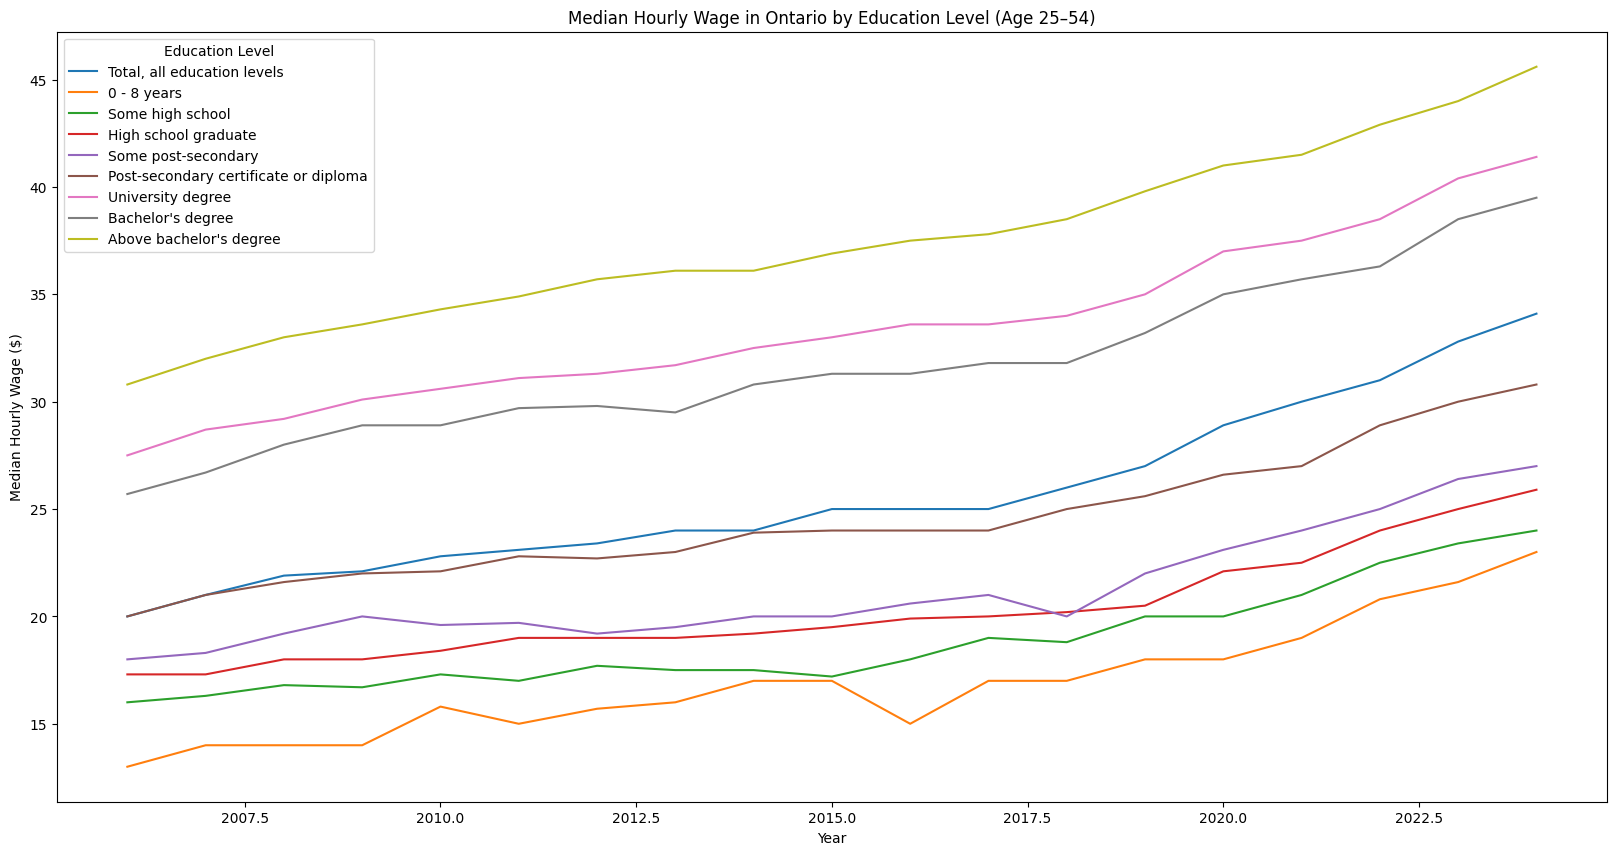

In [ ]:
# revised filter + reshape + replot post-issues with my values


# strip spaces in column names + category values - doing it again because just in case 
df.columns = df.columns.str.strip()
for c in ["GEOGRAPHY","IMMIGRANT","TYPE OF WORK","WAGE RATE","EDUCATION","AGE GROUP"]:
    df[c] = df[c].astype(str).str.strip()

# 1) Filter
ontario_df = df[
    (df["GEOGRAPHY"] == "Ontario") &
    (df["WAGE RATE"] == "Median hourly wage") &
    (df["TYPE OF WORK"] == "All employees") &
    (df["IMMIGRANT"] == "Total") &
    (df["AGE GROUP"] == "25 - 54")
].copy()

print("Rows in ontario_df:", len(ontario_df))

# 2) Reshape sex columns into long format
long_df = ontario_df.melt(
    id_vars=["YEAR", "EDUCATION", "AGE GROUP"],
    value_vars=["Both sexes", "Men", "Women"],  # because we stripped df.columns above
    var_name="SEX",
    value_name="WAGE"
)

# 3) Clean numeric wage values
long_df["WAGE"] = pd.to_numeric(long_df["WAGE"], errors="coerce")
long_df = long_df.dropna(subset=["WAGE"])

# 4) Plot: wages over time by education (Both sexes)
plt.figure(figsize=(20,10)) # 2 just made graph bigger to make room for the legend
sns.lineplot(
    data=long_df[long_df["SEX"] == "Both sexes"],
    x="YEAR",
    y="WAGE",
    hue="EDUCATION"
)
plt.legend(title="Education Level", bbox_to_anchor=(1.02, 1), loc="upper left") # 1st attempt at trying to move legened
plt.title("Median Hourly Wage in Ontario by Education Level (Age 25–54)")
plt.ylabel("Median Hourly Wage ($)")
plt.xlabel("Year")
plt.legend(title="Education Level")
plt.show()

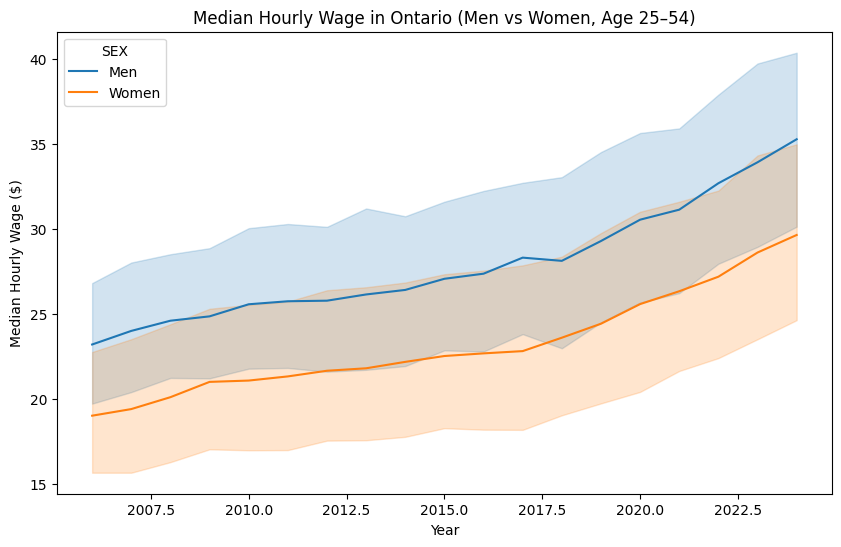

In [33]:
# men vs. women instead of filtered data

plt.figure(figsize=(10,6))
sns.lineplot(
    data=long_df[long_df["SEX"].isin(["Men", "Women"])],
    x="YEAR",
    y="WAGE",
    hue="SEX"
)

plt.title("Median Hourly Wage in Ontario (Men vs Women, Age 25–54)")
plt.ylabel("Median Hourly Wage ($)")
plt.xlabel("Year")
plt.show()

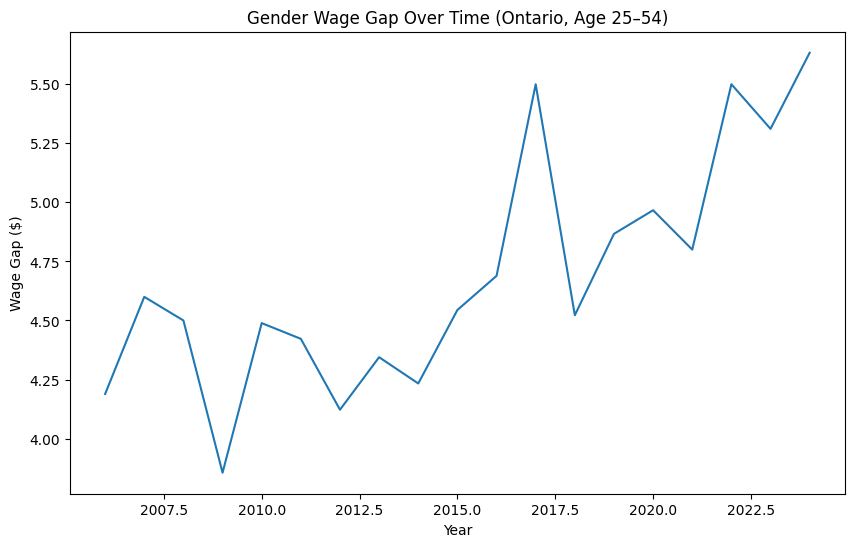

In [ ]:
# gender paygap over time 
gap_df = long_df.pivot_table(
    index="YEAR",
    columns="SEX",
    values="WAGE",
    aggfunc="mean"
)

gap_df["Gap (Men - Women)"] = gap_df["Men"] - gap_df["Women"]

plt.figure(figsize=(10,6))
sns.lineplot(
    data=gap_df,
    x=gap_df.index,
    y="Gap (Men - Women)"
)

plt.title("Gender Wage Gap Over Time (Ontario, Age 25–54)")
plt.ylabel("Wage Gap ($)")
plt.xlabel("Year")
plt.show()

In [41]:
# % of growth from 2006-2024

#filter to both sexes
both_df = long_df[long_df["SEX"] == "Both sexes"]

# pivot so years becomes columns
growth_df = both_df.pivot_table(
    index="EDUCATION",
    columns="YEAR",
    values="WAGE"
)

# calcukate % of growth
growth_df["% Growth (2006-2024)"] = (
    (growth_df[2024] - growth_df[2006]) / growth_df[2006]
) * 100

growth_df.sort_values("% Growth (2006-2024)", ascending=False)

YEAR,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,% Growth (2006-2024)
EDUCATION,,,,,,,,,,,,,,,,,,,,
0 - 8 years,13.0,14.0,14.0,14.0,15.8,15.0,15.7,16.0,17.0,17.0,15.0,17.0,17.0,18.0,18.0,19.0,20.8,21.6,23.0,76.923077
"Total, all education levels",20.0,21.0,21.9,22.1,22.8,23.1,23.4,24.0,24.0,25.0,25.0,25.0,26.0,27.0,28.9,30.0,31.0,32.8,34.1,70.500000
Post-secondary certificate or diploma,20.0,21.0,21.6,22.0,22.1,22.8,22.7,23.0,23.9,24.0,24.0,24.0,25.0,25.6,26.6,27.0,28.9,30.0,30.8,54.000000
Bachelor's degree,25.7,26.7,28.0,28.9,28.9,29.7,29.8,29.5,30.8,31.3,31.3,31.8,31.8,33.2,35.0,35.7,36.3,38.5,39.5,53.696498
University degree,27.5,28.7,29.2,30.1,30.6,31.1,31.3,31.7,32.5,33.0,33.6,33.6,34.0,35.0,37.0,37.5,38.5,40.4,41.4,50.545455
Some post-secondary,18.0,18.3,19.2,20.0,19.6,19.7,19.2,19.5,20.0,20.0,20.6,21.0,20.0,22.0,23.1,24.0,25.0,26.4,27.0,50.000000
Some high school,16.0,16.3,16.8,16.7,17.3,17.0,17.7,17.5,17.5,17.2,18.0,19.0,18.8,20.0,20.0,21.0,22.5,23.4,24.0,50.000000
High school graduate,17.3,17.3,18.0,18.0,18.4,19.0,19.0,19.0,19.2,19.5,19.9,20.0,20.2,20.5,22.1,22.5,24.0,25.0,25.9,49.710983
Above bachelor's degree,30.8,32.0,33.0,33.6,34.3,34.9,35.7,36.1,36.1,36.9,37.5,37.8,38.5,39.8,41.0,41.5,42.9,44.0,45.6,48.051948


In [42]:
# gender wage gap (dollar difference)
# pivot by sex
gap_df = long_df.pivot_table(
    index="YEAR",
    columns="SEX",
    values="WAGE",
    aggfunc="mean"
)

# calculate difference
gap_df["Gap ($)"] = gap_df["Men"] - gap_df["Women"]
gap_df.head()

SEX,Both sexes,Men,Women,Gap ($)
YEAR,,,,
2006,20.922222,23.222222,19.033333,4.188889
2007,21.700000,24.022222,19.422222,4.600000
2008,22.411111,24.622222,20.122222,4.500000
2009,22.822222,24.877778,21.022222,3.855556
2010,23.311111,25.588889,21.100000,4.488889


In [ ]:
gap_2006 = gap_df.loc[2006, "Gap ($)"]
gap_2024 = gap_df.loc[2024, "Gap ($)"]

percent_change_gap = ((gap_2024 - gap_2006) / gap_2006) * 100

print("Percent change in gender wage gap:", percent_change_gap)
# crazy! gap increased by 34%

Percent change in gender wage gap: 34.48275862068964


In [50]:
# wage premium (above bacherlors vs high)
premium_df = both_df.pivot_table(
    index="YEAR",
    columns="EDUCATION",
    values="WAGE"
)

premium_df["Premium ($)"] = (
    premium_df["Above bachelor's degree"] -
    premium_df["High school graduate"]
)
premium_df.loc[2006]
premium_df.loc[2024]

EDUCATION
0 - 8 years                              23.0
Above bachelor's degree                  45.6
Bachelor's degree                        39.5
High school graduate                     25.9
Post-secondary certificate or diploma    30.8
Some high school                         24.0
Some post-secondary                      27.0
Total, all education levels              34.1
University degree                        41.4
Premium ($)                              19.7
Name: 2024, dtype: float64

C:\Users\Brianna\AppData\Local\Temp\ipykernel_38036\4222572136.py:77: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


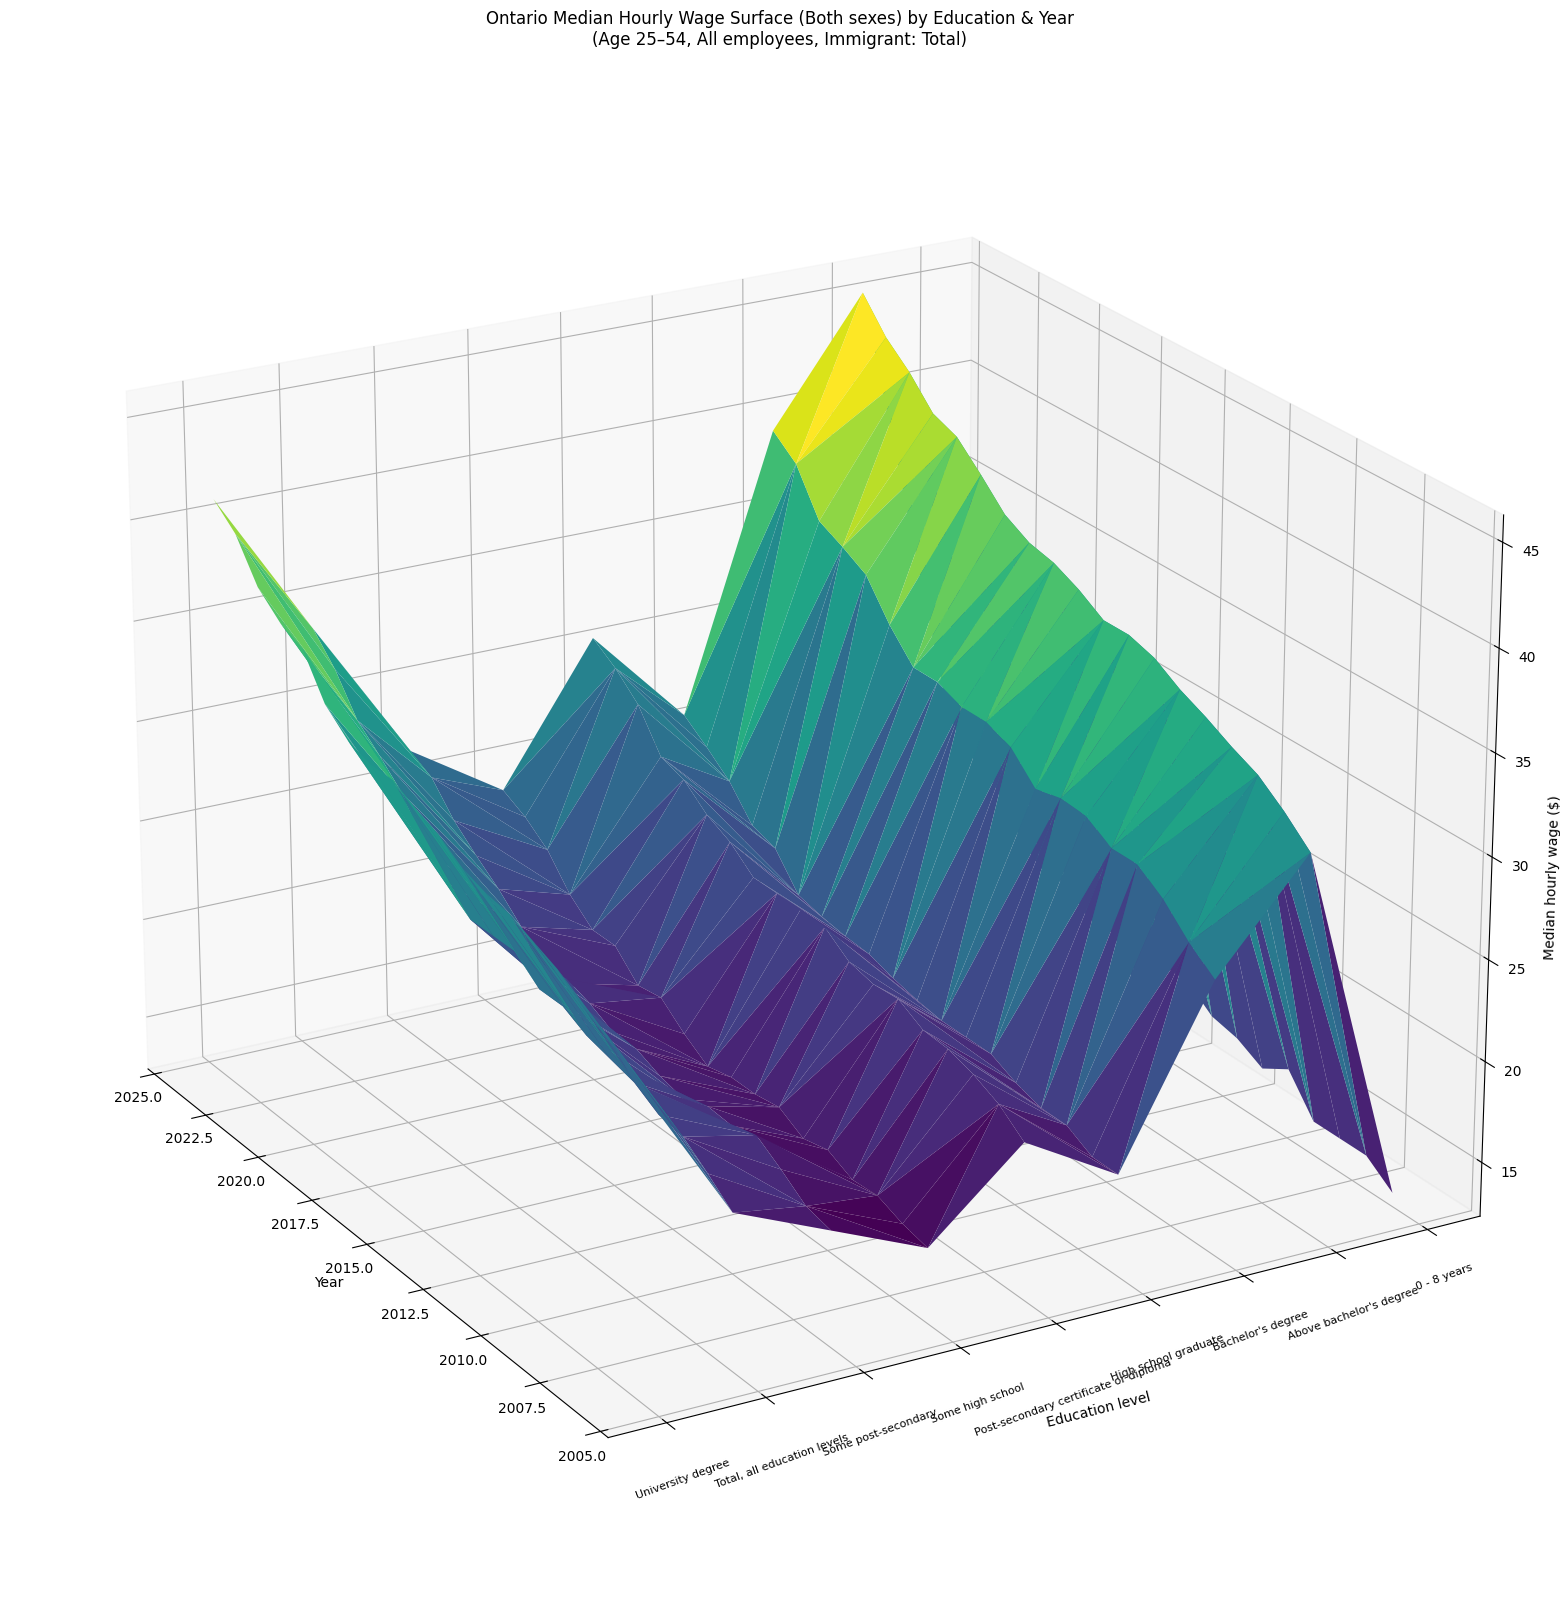

In [ ]:


# 1) Load CSV 
df = pd.read_csv(r"C:\Users\Brianna\visualization\02_activities\assignments\data\img-wage-rate-by-edu-age-sex-ft-pt-ca-on-2006-24.csv")

# 2) Clean column names 
df.columns = df.columns.str.strip()

# 3) Clean key dimension values (safe against hidden whitespace)
for c in ["GEOGRAPHY", "IMMIGRANT", "TYPE OF WORK", "WAGE RATE", "EDUCATION", "AGE GROUP"]:
    df[c] = df[c].astype(str).str.strip()

# 4) Filter to your chosen slice
filtered = df[
    (df["GEOGRAPHY"] == "Ontario") &
    (df["IMMIGRANT"] == "Total") &
    (df["TYPE OF WORK"] == "All employees") &
    (df["WAGE RATE"] == "Median hourly wage") &
    (df["AGE GROUP"] == "25 - 54")
].copy()

# 5) Make sure wage column is numeric 
# Options: "Both sexes", "Men", "Women"
filtered["Both sexes"] = pd.to_numeric(filtered["Both sexes"], errors="coerce")
filtered = filtered.dropna(subset=["Both sexes"])

# 6) Build a grid: rows=EDUCATION, cols=YEAR, values=WAGE
grid = filtered.pivot_table(
    index="EDUCATION",
    columns="YEAR",
    values="Both sexes",
    aggfunc="mean"
).sort_index()


# 7) Convert the grid to X (Year), Y (Education code), Z (Wage)
years = grid.columns.to_numpy()
edu_labels = grid.index.to_list()
edu_codes = range(len(edu_labels))

X, Y = [], []
Z = []

for i, edu in enumerate(edu_labels):
    for yr in years:
        wage = grid.loc[edu, yr]
        if pd.notna(wage):
            X.append(yr)       # Year
            Y.append(i)        # Education code
            Z.append(wage)     # Wage

# 8) Plot 3D surface 
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection="3d")

trisurf = ax.plot_trisurf(X, Y, Z, cmap=plt.cm.viridis, linewidth=0.2)

ax.set_title("Ontario Median Hourly Wage Surface (Both sexes) by Education & Year\n(Age 25–54, All employees, Immigrant: Total)")
ax.set_xlabel("Year")
ax.set_ylabel("Education level", labelpad=40)
ax.set_zlabel("Median hourly wage ($)")

# Replace numeric Y ticks with education labels (keep it readable)
ax.set_yticks(list(edu_codes))
ax.set_yticklabels(edu_labels, fontsize=8)

# Camera angle (try a few azim values: 120, 140, 160)
ax.view_init(elev=22, azim=150)

# Move axis label away from plot
ax.set_ylabel("Education level", labelpad=25)

# Increase distance of tick labels from axis
ax.tick_params(axis='y', pad=10)

# Slight rotation can help
ax.set_yticklabels(edu_labels, fontsize=8, rotation=20)

plt.tight_layout()
plt.show()

C:\Users\Brianna\AppData\Local\Temp\ipykernel_38036\2542548882.py:83: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


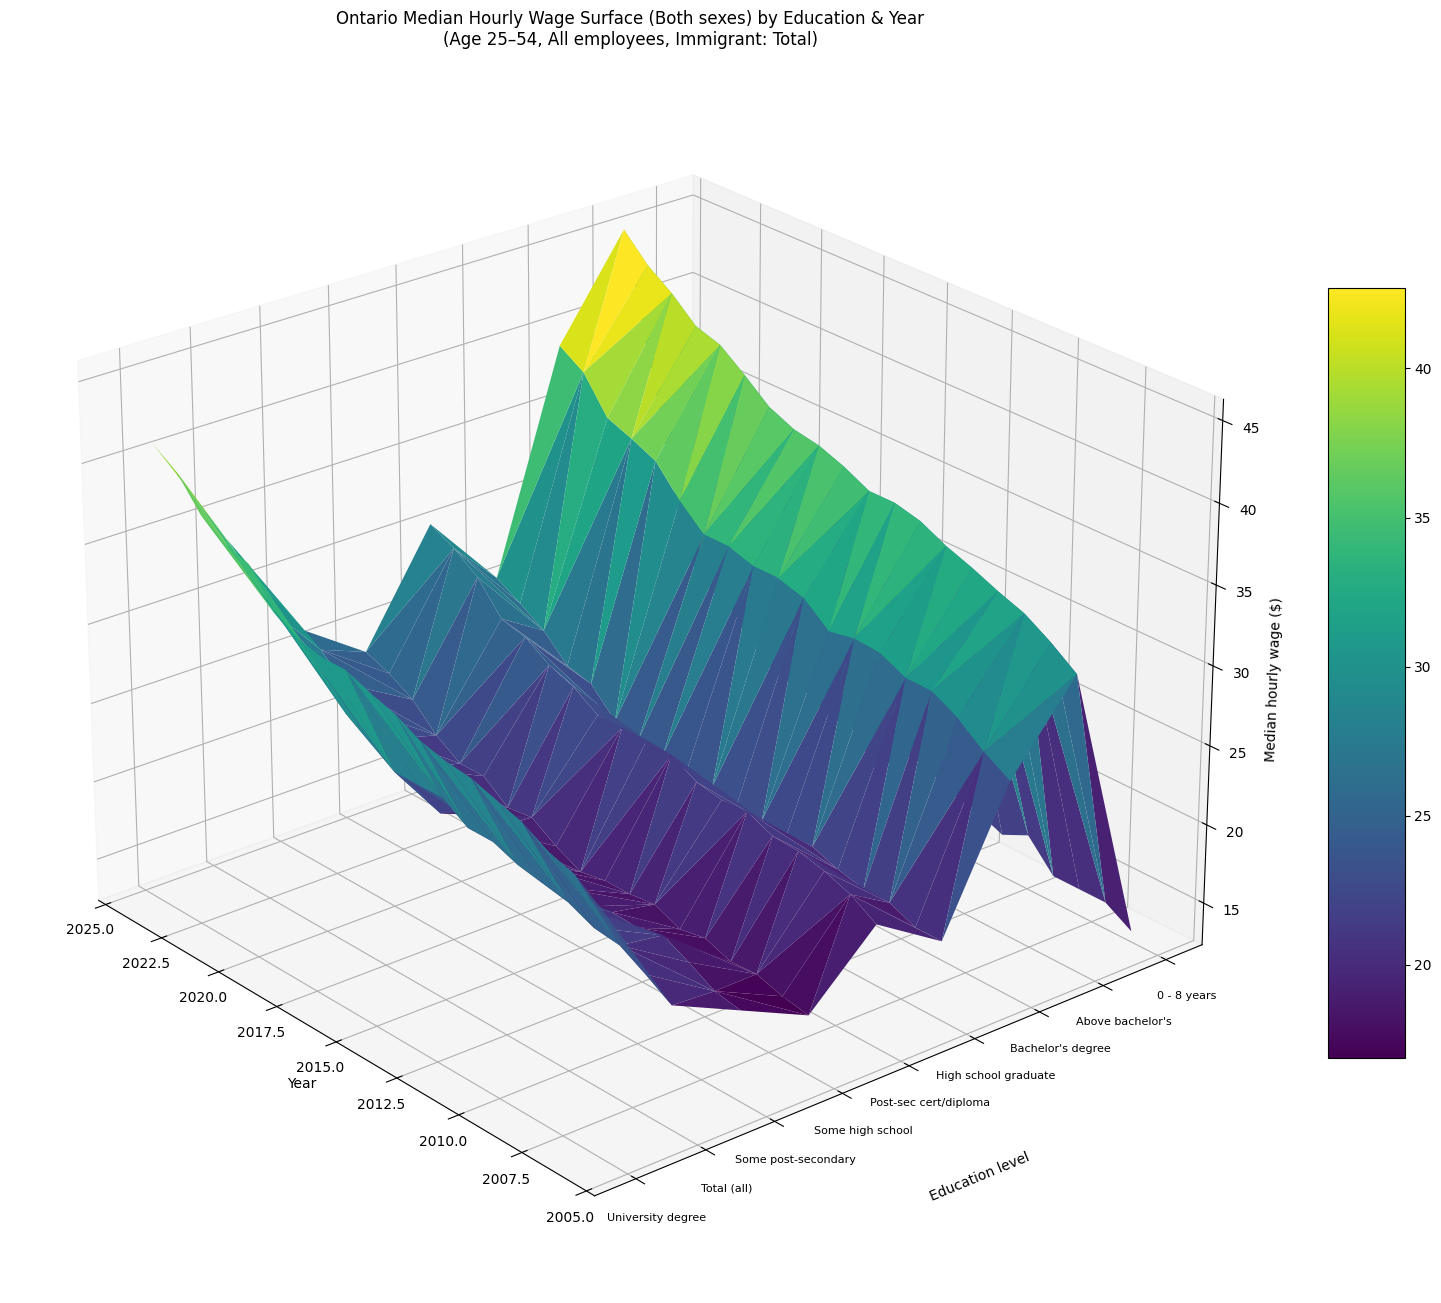

In [ ]:
#fixed the labels

# 1) Load CSV 
df = pd.read_csv(r"C:\Users\Brianna\visualization\02_activities\assignments\data\img-wage-rate-by-edu-age-sex-ft-pt-ca-on-2006-24.csv")

# 2) Clean column names 
df.columns = df.columns.str.strip()

# 3) Clean key dimension values (safe against hidden whitespace)
for c in ["GEOGRAPHY", "IMMIGRANT", "TYPE OF WORK", "WAGE RATE", "EDUCATION", "AGE GROUP"]:
    df[c] = df[c].astype(str).str.strip()

# 4) Filter chosen slice
filtered = df[
    (df["GEOGRAPHY"] == "Ontario") &
    (df["IMMIGRANT"] == "Total") &
    (df["TYPE OF WORK"] == "All employees") &
    (df["WAGE RATE"] == "Median hourly wage") &
    (df["AGE GROUP"] == "25 - 54")
].copy()

# 5) Make sure wage column is numeric 
# Options: "Both sexes", "Men", "Women"
filtered["Both sexes"] = pd.to_numeric(filtered["Both sexes"], errors="coerce")
filtered = filtered.dropna(subset=["Both sexes"])

# 6) Build a grid: rows=EDUCATION, cols=YEAR, values=WAGE
grid = filtered.pivot_table(
    index="EDUCATION",
    columns="YEAR",
    values="Both sexes",
    aggfunc="mean"
).sort_index()


# 7) Convert the grid to X (Year), Y (Education code), Z (Wage)
years = grid.columns.to_numpy()
edu_labels = grid.index.to_list()
edu_codes = range(len(edu_labels))

X, Y = [], []
Z = []

for i, edu in enumerate(edu_labels):
    for yr in years:
        wage = grid.loc[edu, yr]
        if pd.notna(wage):
            X.append(yr)       # Year
            Y.append(i)        # Education code
            Z.append(wage)     # Wage

# 8) Plot 3D surface 
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection="3d")

trisurf = ax.plot_trisurf(X, Y, Z, cmap=plt.cm.viridis, linewidth=0.2)

ax.set_title("Ontario Median Hourly Wage Surface (Both sexes) by Education & Year\n(Age 25–54, All employees, Immigrant: Total)")
ax.set_xlabel("Year")
ax.set_ylabel("Education level", labelpad=40)
ax.set_zlabel("Median hourly wage ($)")

label_map = {
    "Post-secondary certificate or diploma": "Post-sec cert/diploma",
    "Above bachelor's degree": "Above bachelor's",
    "Total, all education levels": "Total (all)",
}

short_labels = [label_map.get(x, x) for x in edu_labels]

ax.set_yticks(list(edu_codes))
ax.set_yticklabels(short_labels, fontsize=8)
ax.tick_params(axis='y', pad=10)

# Camera angle
#ax.view_init(30, 110)
ax.view_init(elev=25, azim=140)
# Colorbar
fig.colorbar(trisurf, ax=ax, shrink=0.5, aspect=10)

plt.tight_layout()
plt.show()

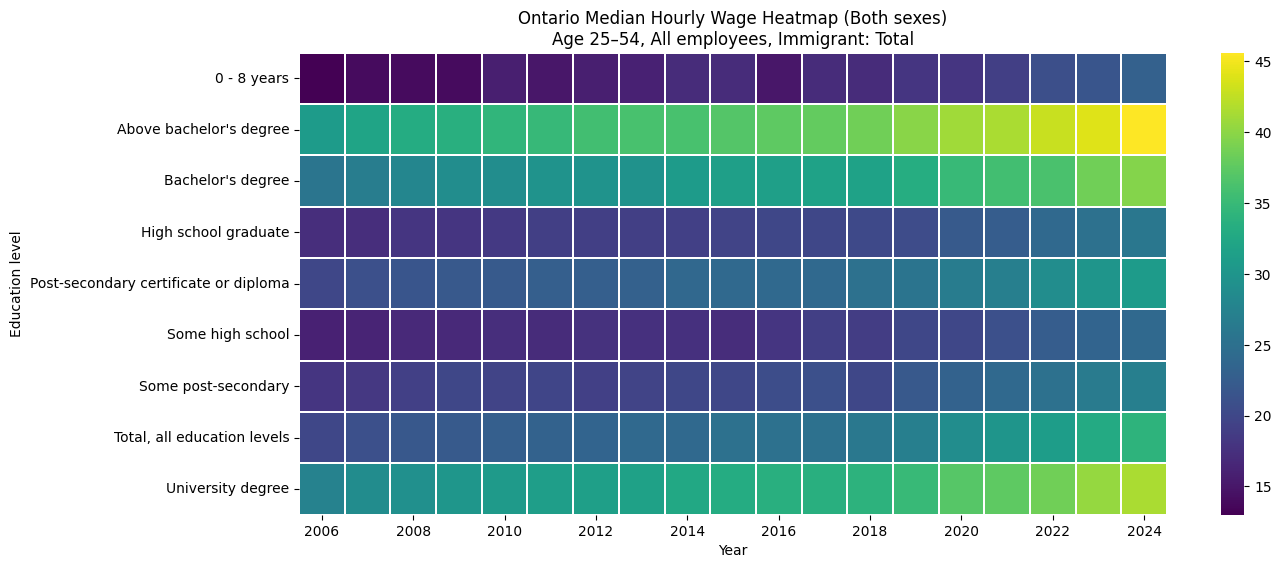

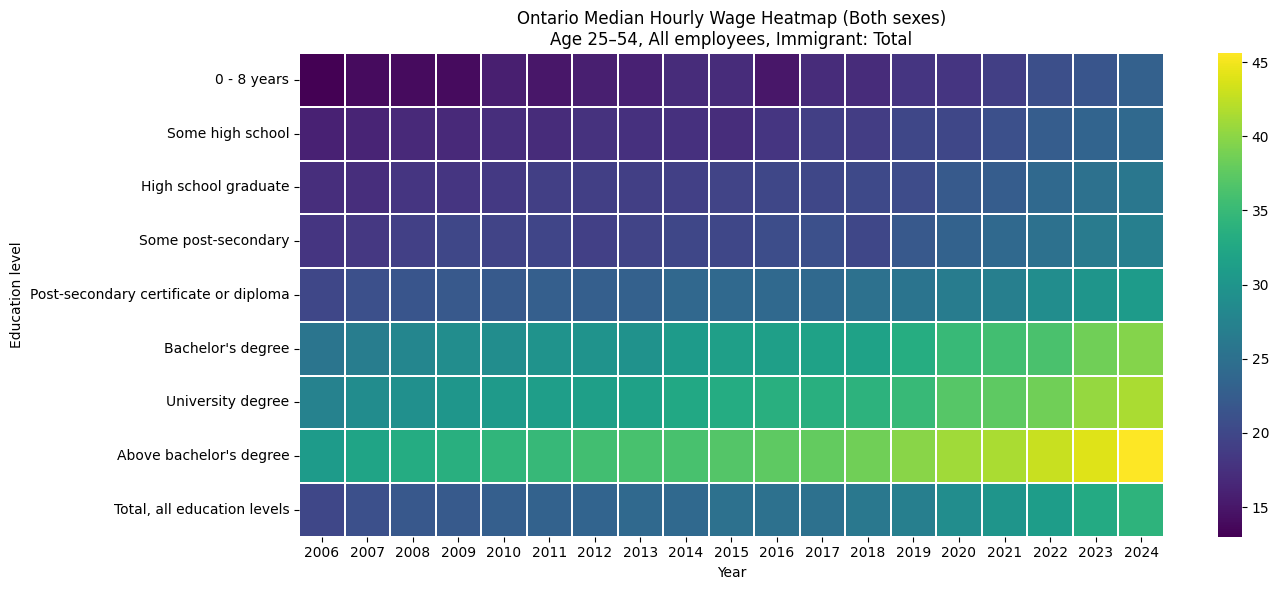

In [68]:


plt.figure(figsize=(14, 6))

ax = sns.heatmap(
    grid,
    cmap="viridis",
    linewidths=0.2,
    linecolor="white"
)

ax.set_title("Ontario Median Hourly Wage Heatmap (Both sexes)\nAge 25–54, All employees, Immigrant: Total")
ax.set_xlabel("Year")
ax.set_ylabel("Education level")

# Show fewer year labels (every 2 years) for readability
years = grid.columns.tolist()
keep = [i for i, y in enumerate(years) if (y - years[0]) % 2 == 0]
ax.set_xticks([i + 0.5 for i in keep])
ax.set_xticklabels([years[i] for i in keep], rotation=0)

edu_order = [
    "0 - 8 years",
    "Some high school",
    "High school graduate",
    "Some post-secondary",
    "Post-secondary certificate or diploma",
    "Bachelor's degree",
    "University degree",
    "Above bachelor's degree",
    "Total, all education levels",
]

grid2 = grid.reindex([e for e in edu_order if e in grid.index])

plt.figure(figsize=(14, 6))
ax = sns.heatmap(grid2, cmap="viridis", linewidths=0.2, linecolor="white")
ax.set_title("Ontario Median Hourly Wage Heatmap (Both sexes)\nAge 25–54, All employees, Immigrant: Total")
ax.set_xlabel("Year")
ax.set_ylabel("Education level")
plt.tight_layout()
plt.show()

Visualization 1: Python (Heatmap & 3D Surface)

What software did you use to create your data visualization?

I used Python (Pandas, Matplotlib, and Seaborn) to clean, transform, and visualize the Ontario Open Data dataset on median hourly wages by education level (2006–2024). The heatmap was created using Seaborn, and the 3D surface visualization was created using Matplotlib’s 3D plotting tools.

---

Who is your intended audience?

The intended audience includes policymakers, labour economists, students evaluating educational pathways, and members of the public interested in wage inequality and economic mobility in Ontario.

---

What information or message are you trying to convey with your visualization?

The visualizations communicate that while wages have increased over time across all education levels, there remains a substantial and persistent wage gap between lower and higher levels of education. The heatmap clearly illustrates the magnitude of wage differences across education levels and over time, while the 3D surface demonstrates the structural wage gradient across both time and educational attainment. Together, they highlight the strong and potentially widening economic returns to higher education.

---

What aspects of design did you consider when making your visualization? How did you apply them? With what elements of your plots?

I considered clarity, interpretability, and visual hierarchy. To reduce clutter, I filtered the dataset to Ontario, total immigrant status, all employees, and ages 25–54. I used a perceptually uniform, colourblind-friendly colourmap (viridis) in both the heatmap and the 3D surface to ensure accessibility and consistent interpretation of wage magnitude. Education levels were reordered logically from lowest to highest to improve interpretability. In the 3D visualization, I adjusted camera angles and label placement to improve readability. In the heatmap, I reduced unnecessary gridlines and controlled tick spacing to maintain visual clarity.

---

How did you ensure that your data visualizations are reproducible? If the tool you used to make your data visualization is not reproducible, how will this impact your data visualization?

The Python visualizations are fully reproducible. All data cleaning, filtering, transformation (including pivoting and reshaping), and calculations were performed in a documented, commented Python script. The raw CSV file is linked, and the full code is included in the assignment folder as an appendix. Any user with the dataset and script can reproduce the results exactly. Since Python is a scripting language, the process is deterministic and transparent.

---

How did you ensure that your data visualization is accessible?

I used a colorblind-friendly colormap (viridis) and ensured strong contrast between labels and background. Axis titles and descriptive plot titles were included for clarity. I avoided excessive colour saturation and ensured that information was not conveyed solely by colour. Written explanations accompany each visualization, making key insights accessible even without relying solely on the visual display.

---

Who are the individuals and communities who might be impacted by your visualization?

The visualization may impact students making decisions about education, workers evaluating long-term earning potential, policymakers designing education or labour policy, and communities affected by wage inequality. By highlighting differences in economic outcomes across education levels, the visualization may influence discussions around access to education and income inequality.

---

How did you choose which features of your chosen dataset to include or exclude from your visualization?

The dataset contains multiple dimensions, including immigrant status, type of work, age groups, and geography. To maintain clarity and avoid visual overload, I restricted the analysis to Ontario, total immigrant status, all employees, and the 25–54 age group. These selections allowed me to focus on structural wage patterns without introducing excessive categorical complexity. Additional breakdowns (e.g., by immigrant category or employment type) were intentionally excluded to maintain interpretability.

---

What ‘underwater labour’ contributed to your final data visualization product?

Significant preprocessing was required before visualization. This included cleaning hidden whitespace in categorical variables, correcting mislabeled filters that initially returned empty datasets, reshaping the data from wide to long format, converting wage columns to numeric types, constructing pivot tables, calculating education wage premiums and gender wage gaps, and testing multiple visualization types (line charts, 3D surface, heatmap) before selecting the final versions. Adjusting 3D camera angles and axis labelling also required experimentation to improve readability. 

Visualization 2: Tableau Public (Time-Series Line Chart)

What software did you use to create your data visualization?

I used Tableau Public to create an interactive time-series visualization of median hourly wages over time.

---

Who is your intended audience?

The intended audience includes members of the general public, students, and policymakers who may benefit from an interactive and easily interpretable visualization of wage trends.

---

What information or message are you trying to convey with your visualization?

The Tableau visualization focuses on wage growth over time and allows users to observe differences across categories (such as sex or education level, depending on applied filters). The goal is to provide a clear, interactive view of long-term wage trends in Ontario and support comparison across groups.

---

What aspects of design did you consider when making your visualization? How did you apply them? With what elements of your plots?

In Tableau, I prioritized simplicity and readability. I limited the number of visible categories to prevent clutter and used consistent formatting and labelling. I ensured that axes were clearly labelled and avoided unnecessary decorative elements. Filters were applied intentionally to maintain a focused narrative and avoid overwhelming the viewer with too many simultaneous comparisons.

---

How did you ensure that your data visualizations are reproducible? If the tool you used to make your data visualization is not reproducible, how will this impact your data visualization?

Unlike Python, Tableau Public is not fully programmatically reproducible because transformations are performed through a graphical interface. However, all filtering and configuration steps  are visible in the image file. I have included the Tableau file as well. The dataset is linked, and the visualization can be rebuilt by following the described steps. While exact reproduction requires manual recreation in Tableau, the process remains transparent.

---

How did you ensure that your data visualization is accessible?

I ensured high-contrast labelling, avoided excessive colour use, and simplified the number of displayed lines to maintain readability. The visualization includes descriptive titles and clearly labelled axes. Any key insights are also explained in writing to ensure accessibility beyond visual interpretation.

---

Who are the individuals and communities who might be impacted by your visualization?

The visualization may inform students, workers, educators, and policymakers about long-term wage patterns and economic returns to education. It may also contribute to discussions about wage inequality and educational access.

---

How did you choose which features of your chosen dataset to include or exclude from your visualization?

Due to the dataset's multidimensionality, I selectively filtered the data to prevent visual overload. I excluded multiple age groups, immigrant breakdowns, and employment types in order to focus the visualization on the most analytically relevant dimensions for this assignment.

---

What ‘underwater labour’ contributed to your final data visualization product?

A key challenge was that the source dataset was not organized in an optimal format for immediate visualization in Tableau. Wage values were stored in separate columns (Both sexes, Men, Women), and some categorical variables contained inconsistent formatting. Preparing the dataset for effective use required prior cleaning in Python and careful structuring. After reviewing Tableau tutorials, I recognized that additional data restructuring would improve usability, highlighting a learning curve in adapting raw open data to visualization software. This process reinforced the importance of understanding data structure before visualization.